In [99]:
import rsatoolbox
from rsatoolbox.rdm import calc_rdm, calc_rdm_movie
import numpy as np
import matplotlib.pyplot as plt 

In [133]:
d = 3
l = 1.0
kernel = 'gaussian'
U = np.load(f"/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_26_6_2024/kernel/{d}d_neural/projection_{d}d_l{l}_{kernel}.npy")
#V = np.load(f"/Users/ariellerosinski/My Drive/Cambridge/Project/outputs/kernel_SCA/MC_Maze_26_6_2024/kernel/{d}d_aug_behaviour/projection_{d}d_l{l}_{kernel}.npy")

aug_behaviour = np.load('/Users/ariellerosinski/My Drive/Cambridge/Project/datasets/MC_Maze/behaviour/aug_behaviour.npy')

In [135]:
times = np.arange(-250, 450, 20).tolist()   
tim_des = {'time': times}
data_K = rsatoolbox.data.TemporalDataset(U,time_descriptors = tim_des)
behaviour_K = rsatoolbox.data.TemporalDataset(aug_behaviour,time_descriptors = tim_des)

data_KT = data_K.convert_to_dataset('time')
print(data_KT.measurements.shape)

behaviour_KT = behaviour_K.convert_to_dataset('time')
print(behaviour_KT.measurements.shape)

(108, 3, 35)
(3780, 3)
(3780, 6)


(35, 108, 108)
(1, 3780, 3780)
(1, 3780, 3780)


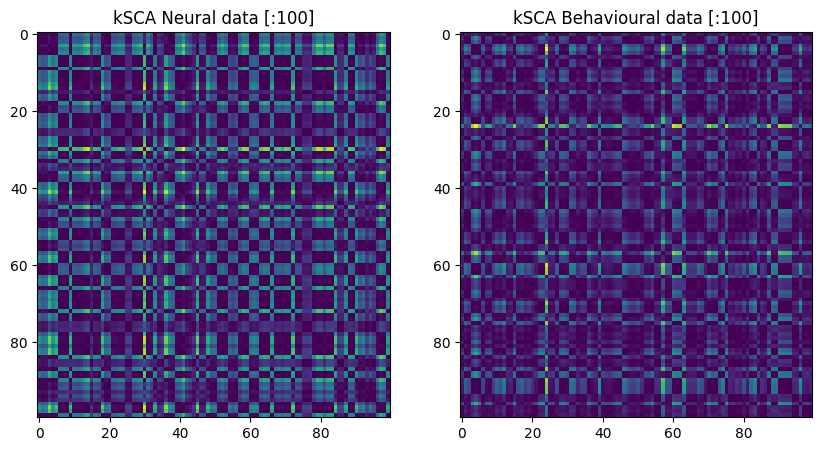

In [132]:
rdms_data_K = calc_rdm_movie(data_K, method = 'euclidean')
print(rdms_data_K.get_matrices().shape)

rdms_data_KT = calc_rdm(data_KT, method = 'euclidean')
print(rdms_data_KT.get_matrices().shape)

rdms_behaviour_KT = calc_rdm(behaviour_KT, method = 'euclidean')
print(rdms_behaviour_KT.get_matrices().shape)

fig, ax = plt.subplots(1,2, figsize=(10,5))
#cmap = plt.get_cmap('gray_r')
ax[0].imshow( rdms_data_KT.get_matrices().squeeze()[:100,:100] , aspect='auto') 
ax[0].set_title('kSCA Neural data [:100]')
ax[1].imshow( rdms_behaviour_KT.get_matrices().squeeze()[:100,:100] , aspect='auto') 
ax[1].set_title('kSCA Behavioural data [:100]')
plt.show()

ENDS HERE 

In [ ]:

data = rsatoolbox.data.Dataset(np.random.rand(10, 5))
rdms = rsatoolbox.rdm.calc_rdm(data)
rsatoolbox.vis.show_rdm(rdms)

plt.figure(figsize=(3,3))
cmap = plt.get_cmap('gray_r')
plt.imshow( rdms.get_matrices().squeeze() , cmap=cmap) 
plt.colorbar()
plt.show()